In [171]:
# Import Pandas and Numpy
import numpy as np
import pandas as pd

# Scikit-learn 
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [172]:
# Load Boston dataset from Sklearn
boston = load_boston()

In [173]:
# This dataset is in a form of dictionary so we can check its keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [174]:
print(boston.data.shape)

(506, 13)


This dataset consists of 506 rows and 13 columns.

In [175]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Below we can check what the column names mean.

In [176]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [177]:
# Define the data/predictors as the pre-set feature names  
X = pd.DataFrame(boston.data, columns=boston.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
y = pd.DataFrame(boston.target, columns=["MEDV"])

In [178]:
# Quick inspection of Dataframes
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [179]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [180]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [181]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
MEDV    506 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


In [182]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


The summary statistics tells us that the mean house price was 22,533. The median was slightly lower at 21,200 which suggests that the distribution might be skewed to the right. The highest price a house was sold for was 50,000. The lowest price recorded was 5000.

/home/ivana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


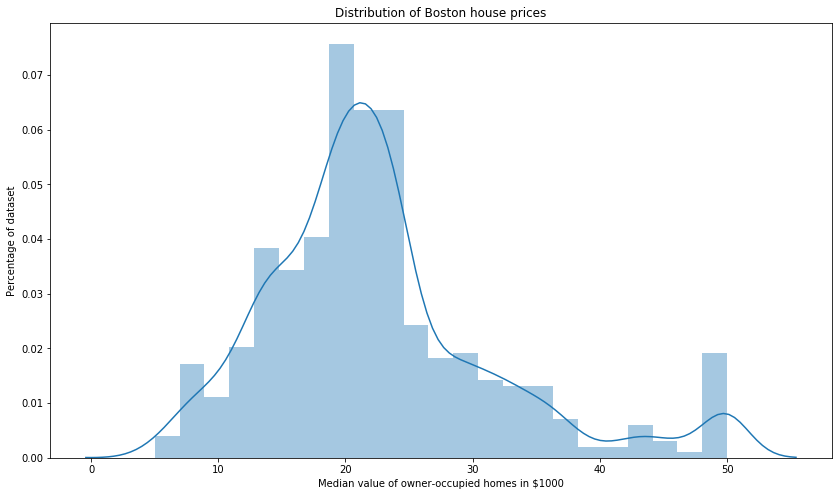

In [183]:
# Plot distribution of house prices
plt.figure(figsize=(14,8))
ax = sns.distplot(y)
plt.title('Distribution of Boston house prices')
ax.set(xlabel='Median value of owner-occupied homes in $1000', ylabel='Percentage of dataset')
plt.show()


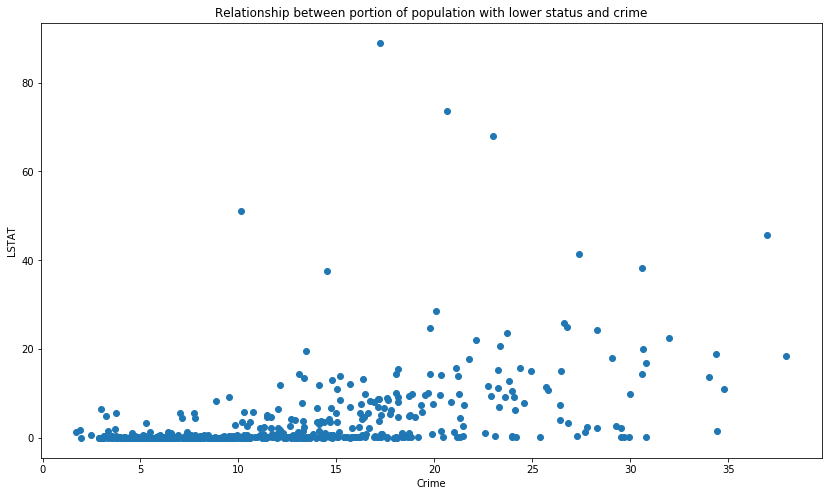

In [184]:
# Draw scatter plot between crime and portion of population with lower status
plt.figure(figsize=(14,8))
plt.scatter(X.LSTAT, X.CRIM)
plt.title('Relationship between portion of population with lower status and crime')
plt.xlabel('Crime')
plt.ylabel('LSTAT')
plt.show()

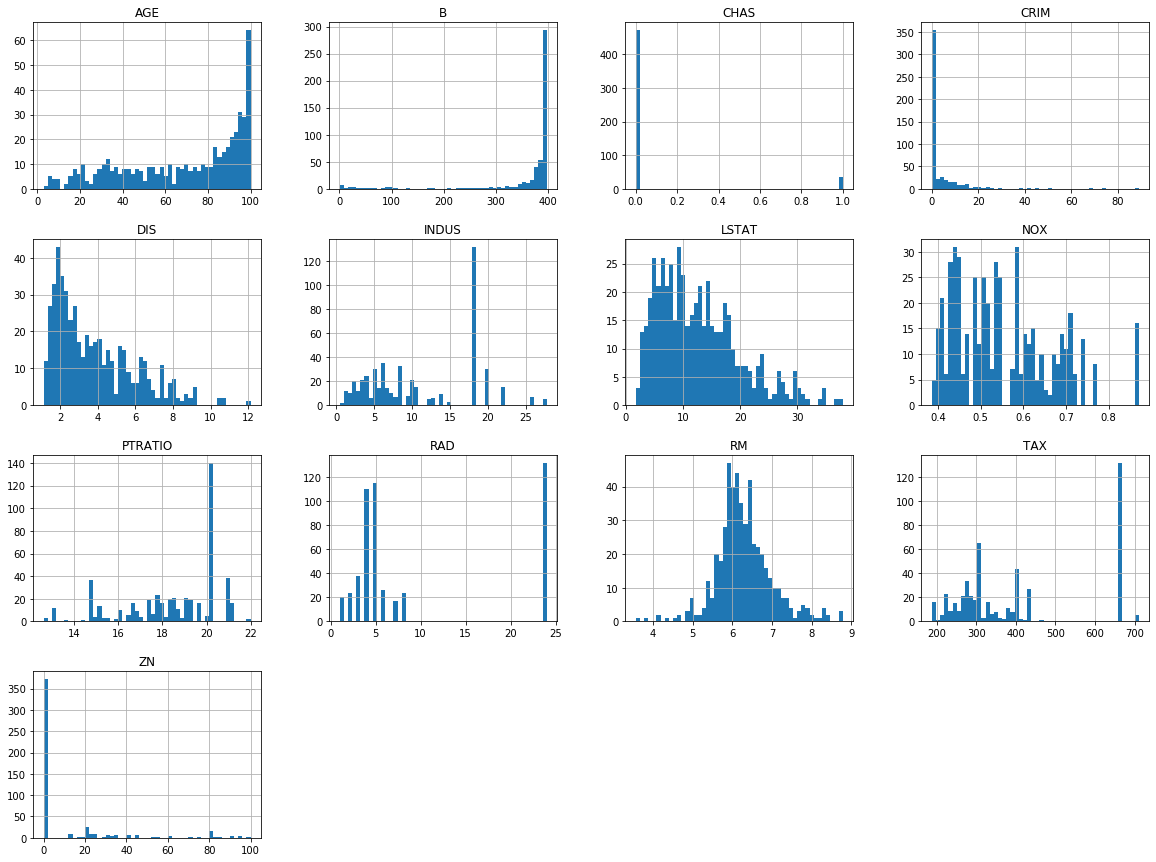

In [185]:
# Analyze the distributions of independent features
X.hist(bins=50,figsize=(20,15))
plt.show()

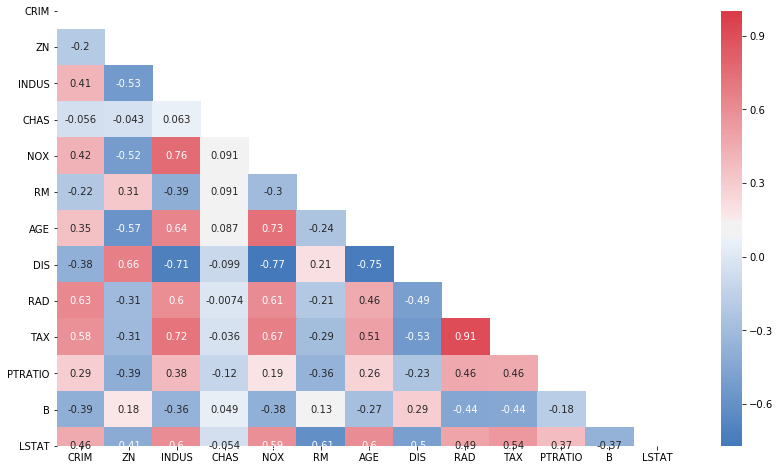

In [186]:
# Analyze correlation between the features
corr = X.corr(method='pearson')

# Plot the corelation heatmap
plt.figure(figsize=(14,8))
matrix = np.triu(corr) # take upper correlation matrix
sns.heatmap(corr, annot = True, mask=matrix, cmap=sns.diverging_palette(250, 10, n=3, as_cmap=True))

Attribute TAX shows high correlation with other attributes, especially RAD (index of accessibility to radial highways). Since Linear regression assumes that the variables are uncorrelated we will exclude TAX from modelling.

In [187]:
# Drop variable Tax
X = X.drop(['TAX'], axis=1)

Now we can split our dataset into train and test. This is done to prevent overfitting. We will train our model on 70% of data and test the model performance with the remaining 30%

In [188]:
# Split data on training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 12)
(152, 12)
(354, 1)
(152, 1)


## Multiple Linear regression

In [189]:
# Fit linear regression 
lm = linear_model.LinearRegression()
lm = lm.fit(X_train, y_train)

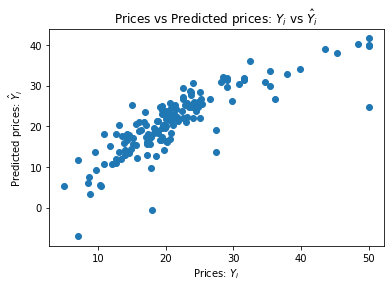

In [190]:
# Predict house prices and plot the differences between actual prices and predicted values 
lm_y_pred = lm.predict(X_test)

plt.scatter(y_test, lm_y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [191]:
# Look at the coefficients 
coef_values = pd.DataFrame(lm.coef_, index=['Coefficient']).transpose()
att_names = pd.DataFrame(X.columns, columns=['Attribute'])
coef_df = pd.concat([att_names,coef_values], axis=1, join='inner')
coef_df

,Attribute,Coefficient
0,CRIM,-0.132722
1,ZN,0.026249
2,INDUS,-0.007801
3,CHAS,3.338702
4,NOX,-16.139852
5,RM,4.114360
6,AGE,-0.011098
7,DIS,-1.366601
8,RAD,0.121465
9,PTRATIO,-0.939701


In [192]:
# Show the intercept of regression
lm.intercept_

array([30.39095377])

In [193]:
# Store the resulting scores 
results = {}

results['Linear regression:'] = 'Coefficient of determination R^2: {:.2f}, Mean Absolut Error: {:.2f}, Mean Squared Error: {:.2f}, Root Mean Squared Error: {:.2f}'.format(lm.score(X_test,y_test),
                                                                                                                                                                    metrics.mean_absolute_error(y_test, lm_y_pred),
                                                                                                                                                                    metrics.mean_squared_error(y_test, lm_y_pred),
                                                                                                                                                                    np.sqrt(metrics.mean_squared_error(y_test, lm_y_pred)))


{'Linear regression:': 'Coefficient of determination R^2: 0.70, Mean Absolut Error: 3.24, Mean Squared Error: 22.47, Root Mean Squared Error: 4.74'}


In [194]:
print('Coefficient of determination R^2 of the prediction: {:.2f}'.format(lm.score(X_test,y_test)))

Coefficient of determination R^2 of the prediction: 0.70


In [195]:
print('Mean Absolut Error: ', metrics.mean_absolute_error(y_test, lm_y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, lm_y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, lm_y_pred)))

Mean Absolut Error:  3.2412913600989595
Mean Squared Error:  22.47426702288998
Root Mean Squared Error:  4.74070322029232


The linear regression aims to establish a linear relationship between the predictor variable(s) and the response variable. However, what if this relationship is not truly linear? For this case, we will try the decision tree as it is a nonparametric model. We can then compare the coefficient of determination and apply a model which predicts prices with higher precision.

## Decision Tree Regressor

In [196]:
# Fit decision tree 
decision_tree =  DecisionTreeRegressor(max_depth=3,random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [197]:
# Print feature importances
decision_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.64420336, 0.        , 0.10423915, 0.        , 0.        ,
       0.02097385, 0.23058364])

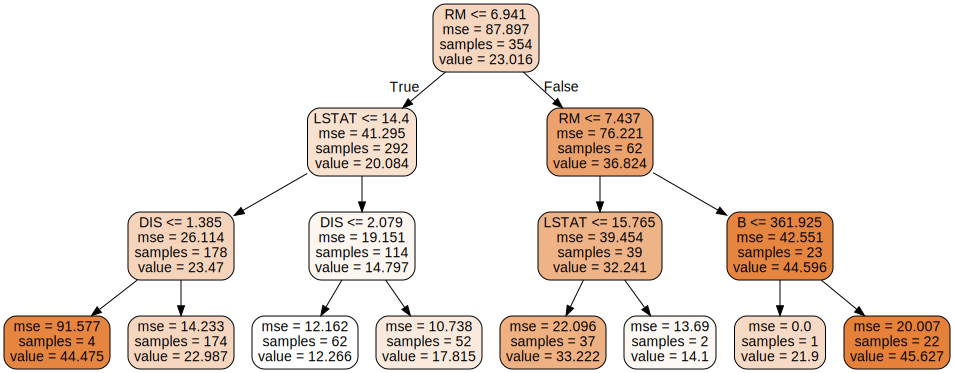

In [198]:
# Draw the decision tree
graph = Source(tree.export_graphviz(
    decision_tree,
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y_train.columns, 
    filled=True,
    rounded=True))

display(SVG(graph.pipe(format='svg')))

Now let's interpret the decision tree. Suppose we find a house which needs to be evaluated. We start at the root node  (top of the decision tree) which asks whether the house has less than 6.94 rooms. If it does, then we move down to the root's left child node.  This node looks if the portion of the population with lower status is less than 14.4. If it is we move to the bottom left node. Lastly, if the weighted distance to five Boston employment centres is less than 1.385 we value our house at 44,475 dollars or if it is further away for 22,987 dollars.

The parameter max_depth sets how many nodes a tree can create. Generaly by adding the nodes the accuracy of prediction increases but we might get into the point where the model overfits and would not perform good on a new set of data. Most decision tree algorithms have multiple stopping criteria, including a user-defined depth and a minimum number of data points that it's willing to split on.

In [199]:
# Fit decision tree with higher mac depth and minimum number of samples required to split an internal node
decision_tree =  DecisionTreeRegressor(max_depth=5,
                                       min_samples_split=15,
                                       random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [200]:
# Make prediction
dt_y_pred = decision_tree.predict(X_test)

In [201]:
# Record and show scores
results['Decision Tree:'] = 'Coefficient of determination R^2: {:.2f}, Mean Absolut Error: {:.2f}, Mean Squared Error: {:.2f}, Root Mean Squared Error: {:.2f}'.format(decision_tree.score(X_test,y_test),
                                                                                                                                                                    metrics.mean_absolute_error(y_test, dt_y_pred),
                                                                                                                                                                    metrics.mean_squared_error(y_test, dt_y_pred),
                                                                                                                                                                    np.sqrt(metrics.mean_squared_error(y_test, dt_y_pred)))
for keys,values in results.items():
    print(keys)
    print(values)
    print('')

Linear regression:
Coefficient of determination R^2: 0.70, Mean Absolut Error: 3.24, Mean Squared Error: 22.47, Root Mean Squared Error: 4.74

Decision Tree:
Coefficient of determination R^2: 0.84, Mean Absolut Error: 2.53, Mean Squared Error: 11.77, Root Mean Squared Error: 3.43



Now when we saw that the decision tree scored a higher accuracy lets try to apply Random forest as our final model.
Random forest combines the predictions made by many decision trees into a single model. Individually, predictions made by decision trees may not be accurate but combined together, the predictions will be closer to the true value on average. Moreover Random Forest is great for reduction in overfitting. By averaging several trees, there is a significantly lower risk of overfitting.

## Random Forest with GridSearch

In [202]:
# Run GridSearch to find the optimal parameters
forest_reg = RandomForestRegressor()
param_grid = {'max_depth': range(3,7),
              'n_estimators': (10, 50, 100),
              'bootstrap': [True, False]
             }
grid_clf = GridSearchCV(forest_reg, param_grid, cv=10)
grid_clf.fit(X_train, y_train.values.ravel())

/home/ivana/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 7), 'n_estimators': (10, 50, 100), 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [203]:
# Display best parameters
best_parameters = grid_clf.best_params_
print(best_parameters)

{'bootstrap': True, 'max_depth': 6, 'n_estimators': 50}


In [204]:
# Fit Random forest with best parameters
final_model = RandomForestRegressor(max_depth=best_parameters['max_depth'],
                            n_estimators=best_parameters['n_estimators'],
                            bootstrap=best_parameters['bootstrap'])
final_model.fit(X_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [205]:
# Make prediction
fr_y_pred = final_model.predict(X_test)

In [207]:
# Record and compare results
results['Random Forest:'] = 'Coefficient of determination R^2: {:.2f}, Mean Absolut Error: {:.2f}, Mean Squared Error: {:.2f}, Root Mean Squared Error: {:.2f}'.format(final_model.score(X_test,y_test),
                                                                                                                                                                    metrics.mean_absolute_error(y_test, fr_y_pred),
                                                                                                                                                                    metrics.mean_squared_error(y_test, fr_y_pred),
                                                                                                                                                                    np.sqrt(metrics.mean_squared_error(y_test, fr_y_pred)))
for keys,values in results.items():
    print(keys)
    print(values)
    print('')

Linear regression:
Coefficient of determination R^2: 0.70, Mean Absolut Error: 3.24, Mean Squared Error: 22.47, Root Mean Squared Error: 4.74

Decision Tree:
Coefficient of determination R^2: 0.84, Mean Absolut Error: 2.53, Mean Squared Error: 11.77, Root Mean Squared Error: 3.43

Random Forest:
Coefficient of determination R^2: 0.87, Mean Absolut Error: 2.18, Mean Squared Error: 9.87, Root Mean Squared Error: 3.14



Comparing the performance measures the Random Forest has shown to predict Boston house prices with the highest precision compared to  Linear regression and Decision Tree. The real estate agency could apply this model whenever trying to evaluate new house being offered for sale. 